# Titanic Dataset Cleaning and Data Wrangling

This project focuses on cleaning and preprocessing the Titanic dataset to improve data quality and prepare it for analysis and machine learning.

In [31]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tabulate import tabulate

In [32]:
#Load Dataset
df = sns.load_dataset('titanic')

In [33]:
# Dataset Preview
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1200)

df_display = df.copy()

df_display.insert(0, "S.No", range(1, len(df_display)+1))

df_display.head(10)

,S.No,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,1,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,2,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,3,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,4,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,5,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,6,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,7,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,8,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,9,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,10,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


# Show missing values ->

In [34]:
missing_table = df.isnull().sum().reset_index()

missing_table.columns = ["Column Name", "Missing Values"]

missing_table = missing_table[missing_table["Missing Values"] > 0]

missing_table.insert(0, "S.No", range(1, len(missing_table)+1))

missing_table.style.hide(axis="index")

S.No,Column Name,Missing Values
1,age,177
2,embarked,2
3,deck,688
4,embark_town,2


# Handle missing value ->

In [35]:
# Fill age with median
df['age'] = df['age'].fillna(df['age'].median())

# Safely handle deck column
if 'Unknown' not in df['deck'].cat.categories:
    df['deck'] = df['deck'].cat.add_categories('Unknown')

df['deck'] = df['deck'].fillna('Unknown')

# Fill embarked with mode
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

# Fill embark_town with mode
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])

# Missing Values After Cleaning ->

In [43]:
missing_after = df.isnull().sum().reset_index()

missing_after.columns = ["Column Name", "Missing Values"]

missing_after.insert(0, "S.No", range(1, len(missing_after)+1))

display(missing_after.style.hide(axis="index"))

if missing_after["Missing Values"].sum() == 0:
    display("Dataset Status: Fully Clean (No Missing Values)")
else:
    display("Dataset Status: Missing Values Still Present")

S.No,Column Name,Missing Values
1,survived,0
2,pclass,0
3,sex,0
4,age,0
5,sibsp,0
6,parch,0
7,fare,0
8,embarked,0
9,class,0
10,who,0


'Dataset Status: Fully Clean (No Missing Values)'

# Categorical Encoding ->

In [44]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Encode categorical columns
df['sex'] = le.fit_transform(df['sex'])
df['embarked'] = le.fit_transform(df['embarked'])
df['embark_town'] = le.fit_transform(df['embark_town'])
df['class'] = le.fit_transform(df['class'])
df['who'] = le.fit_transform(df['who'])
df['alive'] = le.fit_transform(df['alive'])
df['alone'] = le.fit_transform(df['alone'])

# Show Encode Table ->

In [49]:
# Show encoded table
encoded_table = df[['sex','embarked','embark_town','class','who','alive','alone']].copy()

encoded_table.insert(0, "S.No", range(1, len(encoded_table)+1))

display(encoded_table.head(10).style.hide(axis="index"))

# Check and print professional confirmation message
if all(df[col].dtype != 'object' for col in ['sex','embarked','embark_town','class','who','alive','alone']):
    print("\nCategorical encoding completed successfully.")
else:
    print("\nCategorical encoding not completed.")

S.No,sex,embarked,embark_town,class,who,alive,alone
1,1,2,2,2,1,0,0
2,0,0,0,0,2,1,0
3,0,2,2,2,2,1,1
4,0,2,2,0,2,1,0
5,1,2,2,2,1,0,1
6,1,1,1,2,1,0,1
7,1,2,2,0,1,0,1
8,1,2,2,2,0,0,0
9,0,2,2,2,2,1,0
10,0,0,0,1,0,1,0



Categorical encoding completed successfully.


# Feature Normalization ->


In [50]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df['fare'] = scaler.fit_transform(df[['fare']])

# Show normalized fare table
fare_table = df[['fare']].copy()
fare_table.insert(0, "S.No", range(1, len(fare_table)+1))

display(fare_table.head(10).style.hide(axis="index"))

# Confirmation message
if df['fare'].min() >= 0 and df['fare'].max() <= 1:
    print("\nFare normalization completed successfully.")
else:
    print("\nFare normalization not completed.")

S.No,fare
1,0.014151
2,0.139136
3,0.015469
4,0.103644
5,0.015713
6,0.016510
7,0.101229
8,0.041136
9,0.021731
10,0.058694



Fare normalization completed successfully.


# Correlation Heatmap ->

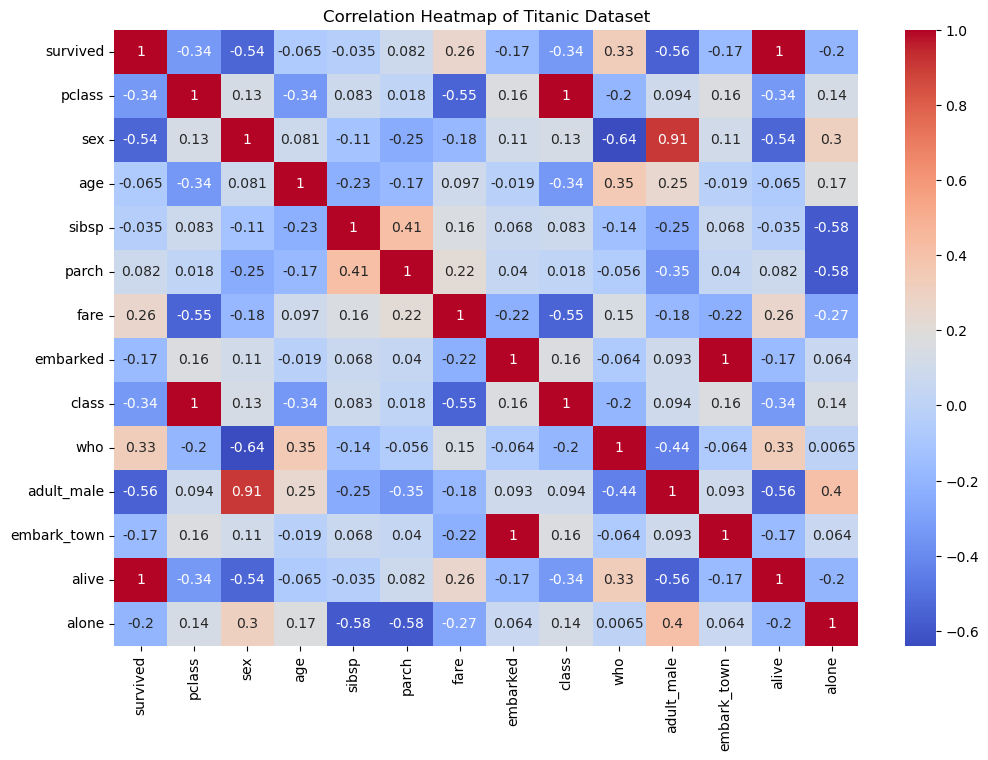


Correlation heatmap generated successfully.


In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))

corr = df.corr(numeric_only=True)

sns.heatmap(corr, annot=True, cmap='coolwarm')

plt.title("Correlation Heatmap of Titanic Dataset")

plt.show()

print("\nCorrelation heatmap generated successfully.")

In [52]:
df.to_csv("titanic_cleaned.csv", index=False)

print("\nDataset saved successfully as 'titanic_cleaned.csv'.")


Dataset saved successfully as 'titanic_cleaned.csv'.


## Conclusion

The Titanic dataset was successfully cleaned and preprocessed. Missing values were handled, categorical variables were encoded, fare was normalized, and correlation analysis was performed. The dataset is now fully clean and ready for analysis and machine learning.